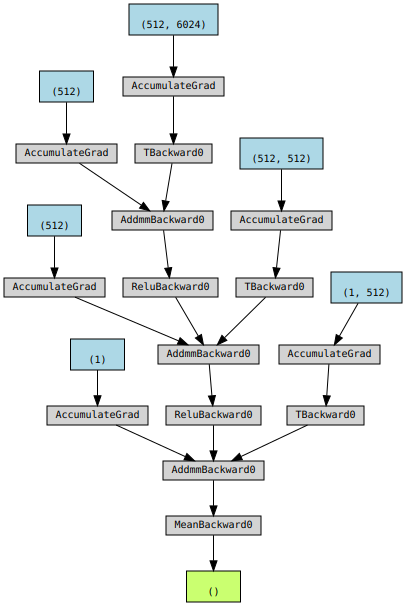

In [8]:
import numpy as np
import pandas as pd
from src.models.sac_agent import Agent
from src.models.utils import plot_learning_curve
from src.models.environment import MolSynthPool
from datetime import datetime
from os import path, makedirs
import torch
from torchviz import make_dot


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


mol_path = '../../Data/SAC/chemdiv_bb.csv'
react_path = '../../Data/SAC/hartenfeller-smirks.csv'
target = 'Cc1cc(C)n(-c2nc(N3CCOCC3)nc(N3CCOCC3)n2)n1'
env = MolSynthPool(mol_path, react_path, target, max_t=30, num_reactions=58, num_reactants=5000)
agent = Agent(input_dims=[env.fp_nbits], env=env,
              n_actions=env.num_reactants, batch_size=10)
n_games = 10

reward_img_file = 'sac_reward.png'
reward_data_file = 'sac_reward.csv'
reactant_data_file = 'reactants.csv'
run_datetime = datetime.now().strftime("%Y-%m-%d_%H.%M.%S")
base_save_dir = path.join('logs/', run_datetime)
makedirs(base_save_dir)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
make_dot(agent.critic_1(torch.randn(1, 1024).to(device), torch.randn(1, 5000).to(device)).mean(), params=dict(agent.actor.named_parameters()))

In [ ]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.rdChemReactions import ReactionFromSmarts

In [142]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_path = '..\models\logs'
base = pd.DataFrame({"SMILES": [], "QED": []})
rewards = []
for f1 in [f.path for f in os.scandir(data_path) if f.is_dir()]:
    reward = pd.read_csv(os.path.join(f1, 'sac_reward.csv'))['AvgReward']
    rewards.append(list(reward))
    for f2 in [f.path for f in os.scandir(f1) if f.is_dir()]:
        props = pd.read_csv(os.path.join(f2, 'props.csv'), index_col=False)
        base = base.append(props, ignore_index=True)
rewards.sort(key=lambda x: x[-1], reverse=False)
sorted = base.sort_values('QED', ascending=False)

In [143]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToFile

x = MolFromSmiles('Cc1cc(O)cc(C2CCN(C(=O)c3cc(C(F)F)nn3C)C2)n1')
y = MolFromSmiles('Cn1nc(C(F)F)cc1C(O)=O')
z = MolFromSmiles('Cc1cc(O)cc(C2CNCC2)n1')
MolToFile(x, '../../figures/best_mol.svg')
MolToFile(y, '../../figures/best_react1.svg')
MolToFile(z, '../../figures/best_react2.svg')

In [ ]:
MolFromSmiles()

In [101]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_path = '..\models\logs'

stuff = []
for f1 in [f.path for f in os.scandir(data_path) if f.is_dir()]:
    base = pd.DataFrame({"SMILES": [], "QED": []})
    for f2 in [f.path for f in os.scandir(f1) if f.is_dir()]:
        props = pd.read_csv(os.path.join(f2, 'props.csv'), index_col=False)
        base = base.append(props, ignore_index=True)
        sorted = base.sort_values('QED', ascending=False).iloc[0]
    stuff.append(sorted)

In [115]:
from scipy.stats import ttest_ind
from scipy.stats import t

initial_qed = pd.read_csv('../../Data/Moses/moses_qed_ascending.csv')['QED'].iloc[0:50]
final_qed = [s['QED'] for s in stuff]


df = pd.DataFrame({'initial': initial_qed, 'final': final_qed})
df.to_csv('../../figures/raw_ttest.csv')


t_stat, p = ttest_ind(df['final'], df['initial'])
print(f't={t_stat}, p={p}')

t=50.64565927314321, p=4.3674033301245037e-72


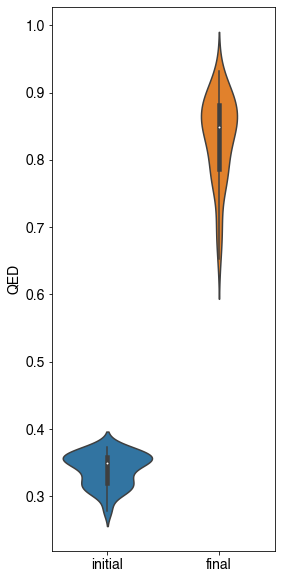

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette('rocket', 3)

figure = plt.figure(figsize=[4, 10])
plt.ylabel('QED')
sns.violinplot(data=df)

figure.savefig('../../figures/violin.svg', format='svg', dpi=1200)

In [149]:
colors = sns.color_palette('rocket', 4)
print([[c*255 for c in color] for color in colors])

[[76.4430789, 28.95802695, 74.59979865000001], [161.0061993, 25.671913349999997, 90.94528844999999], [231.6640269, 62.64960615, 62.7257262], [245.56115205, 156.2192985, 115.1199387]]


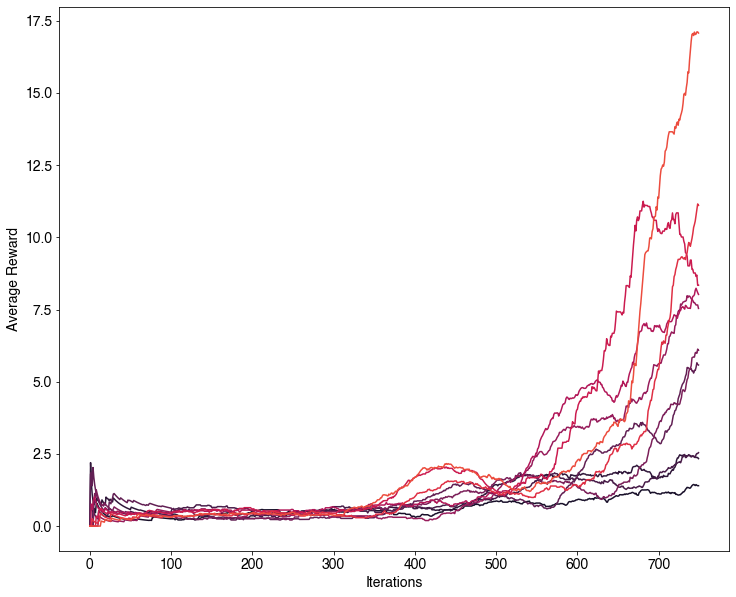

In [85]:
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
colors = sns.color_palette("rocket", 15)
figure = plt.figure(figsize=(12, 10))
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
for i, v in enumerate(rewards):
    plt.plot(v, color=colors[i])

figure.savefig('../../figures/performance.svg', format='svg', dpi=1200)

In [21]:
from rdkit.Chem.QED import default
from rdkit.Chem import MolFromSmiles

default(MolFromSmiles('Cc1cc(C)n(-c2nc(N3CCOCC3)nc(N3CCOCC3)n2)n1'))

0.7880766356942779

In [92]:
from tqdm import tqdm

leads = pd.read_csv('../../Data/Moses/moses_v1.csv')['SMILES'].sample(100000)
qeds = [(default(MolFromSmiles(smiles)), smiles) for smiles in tqdm(leads)]



  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 63/100000 [00:00<02:41, 617.09it/s]

  0%|          | 125/100000 [00:00<02:43, 611.98it/s]

  0%|          | 187/100000 [00:00<02:42, 612.81it/s]

  0%|          | 249/100000 [00:00<02:43, 610.84it/s]

  0%|          | 311/100000 [00:00<02:43, 609.75it/s]

  0%|          | 372/100000 [00:00<02:43, 608.28it/s]

  0%|          | 433/100000 [00:00<02:43, 608.83it/s]

  0%|          | 494/100000 [00:00<02:43, 608.14it/s]

  1%|          | 555/100000 [00:00<02:43, 606.83it/s]

  1%|          | 616/100000 [00:01<02:43, 606.26it/s]

  1%|          | 677/100000 [00:01<02:44, 605.25it/s]

  1%|          | 739/100000 [00:01<02:43, 608.65it/s]

  1%|          | 800/100000 [00:01<02:43, 605.73it/s]

  1%|          | 861/100000 [00:01<02:43, 605.20it/s]

  1%|          | 922/100000 [00:01<02:44, 603.02it/s]

  1%|          | 983/100000 [00:01<02:44, 603.22it/s]

  1%|          | 1044/100000 [00:01<02:45, 596.35it/s]

  1%|          | 11

In [93]:
qeds.sort(key=lambda x: x[0], reverse=False)

In [95]:
qed, smiles = zip(*qeds)
pd.DataFrame({'SMILES':smiles, 'QED':qed}).to_csv('../../Data/Moses/moses_qed_ascending.csv', index=False)

In [96]:
qeds

[(0.27824908397428394, 'COC(=O)C1(O)CC(O)C(NC(C)=O)C(C(O)C(O)CO)O1'),
 (0.28137979370035215, 'O=C(Cc1c(F)c(F)c(F)c(F)c1F)Oc1ccc2c(c1)OCO2'),
 (0.30338316659412057, 'COc1ccc2nc3c(cc2c1)c(=O)oc1ccccc13'),
 (0.30600413353395683, 'Nn1c(SCCCC(=O)c2ccc(F)cc2)nnc1-c1ccco1'),
 (0.30666388437444864, 'Nn1c(SCc2c(F)c(F)c(F)c(F)c2F)nnc1C1CC1'),
 (0.30730134966661277, 'CC(=O)Oc1c2ccccc2cc2c(O)ccc(O)c12'),
 (0.3077571927169406, 'CC(=O)c1ccc(OCC(=O)Oc2ccc3ccc(=O)oc3c2)cc1'),
 (0.3102449808556533, 'CCOC(=O)c1c(C)[nH]c(C)c1C(=O)CSc1nc(N)cc(N)n1'),
 (0.3130194673056836, 'CC(=O)Oc1ccc2c(-c3cc4ccccc4oc3=O)cc(=O)oc2c1'),
 (0.3130596036638051, 'O=C(Oc1ccc2ccc(=O)oc2c1)c1ccc(F)nc1'),
 (0.31890013852846816, 'CCn1c(SCC(=O)OC)nc2cc3ccccc3cc2c1=O'),
 (0.3198581851097962, 'O=C(Cn1c(=O)cnc2ccccc21)Oc1ccc2ccc(=O)oc2c1'),
 (0.3198581851097962, 'O=C(Cn1cnc2ccccc2c1=O)Oc1ccc2ccc(=O)oc2c1'),
 (0.32115391219806744, 'Cc1cnc(C(=O)OCc2cc(=O)oc3ccc4ccccc4c23)cn1'),
 (0.3217601509833497, 'CC(=O)Oc1ccc2cc(C(=O)c3ccccc3)c(=O)o

In [99]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Draw import MolToFile

x = MolFromSmiles('COC2=CC1=CC4=C(N=C1C(=C2)O[H])C3=CC=CC=C3OC4=O')

In [100]:
MolToFile(x, '../../figures/sample_mol1.svg')